### The capstone project

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

path = 'C:/Users/User/Downloads/'

### Load the IMDB dataset from the folder

In [2]:
def load_imdb_dataset(path):
    imdb_path = os.path.join(path, 'aclImdb')

    # Load the dataset
    train_texts = []
    train_labels = []
    test_texts = []
    test_labels = []
    for dset in ['train', 'test']:
        for cat in ['pos', 'neg']:
            dset_path = os.path.join(imdb_path, dset, cat)
            for fname in sorted(os.listdir(dset_path)):
                if fname.endswith('.txt'):
                    with open(os.path.join(dset_path, fname)) as f:
                        if dset == 'train': train_texts.append(f.read())
                        else: test_texts.append(f.read())
                    label = 0 if cat == 'neg' else 1
                    if dset == 'train': train_labels.append(label)
                    else: test_labels.append(label)

    # Converting to np.array
    train_texts = np.array(train_texts)
    train_labels = np.array(train_labels)
    test_texts = np.array(test_texts)
    test_labels = np.array(test_labels)

  
    train_df = pd.DataFrame({'Review':train_texts , 'Label': train_labels})
    test_df=pd.DataFrame({'Review':test_texts , 'Label': test_labels})
    # Return the dataset
    return train_df,test_df

### Create a train and test respectively

In [125]:
train_df,test_df= load_imdb_dataset(path)


In [126]:
train_df.head()

,Label,Review
0,1,Bromwell High is a cartoon comedy. It ran at t...
1,1,Homelessness (or Houselessness as George Carli...
2,1,Brilliant over-acting by Lesley Ann Warren. Be...
3,1,This is easily the most underrated film inn th...
4,1,This is not the typical Mel Brooks film. It wa...


In [127]:
df=train_df

In [ ]:
'<.*?>'

### Removig all the punctuation and '\' symbols

In [431]:
df['Review'] = df['Review'].str.lower().str.replace('[^a-z]', ' ')
df['Review'] = df['Review'].str.lower().str.replace('[^\w\s]',' ')
df['Review'] = df['Review'].str.lower().str.replace(r'<.*?>',' ')
df['Review'] = df['Review'].str.lower().str.replace(' br ',' ')
df.head()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [430]:
df=test_df

### Removing stopwords

In [129]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,Label,Review
0,1,bromwell high cartoon comedy ran time programs...
1,1,homelessness houselessness george carlin state...
2,1,brilliant acting lesley ann warren best dramat...
3,1,easily underrated film inn brooks cannon sure ...
4,1,typical mel brooks film much less slapstick mo...


### Stemming

In [131]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


In [132]:
df['Review'] = df['Review'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [133]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran time program s...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr film inn brook cannon sure flaw ...
4,1,typic mel brook film much less slapstick movi ...


In [134]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Lemmatization

In [135]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: " ".join(wordnet_lemmatizer.lemmatize(word) for word in x.split()))

In [136]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran time program s...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr film inn brook cannon sure flaw ...
4,1,typic mel brook film much le slapstick movi ac...


In [137]:
x_train = df.iloc[:, 1].values
y_train=df.iloc[:,0].values
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran time program s...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr film inn brook cannon sure flaw ...
4,1,typic mel brook film much le slapstick movi ac...


### Feature selection

In [138]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=pd.DataFrame(cv.fit_transform(df.Review[:50]).toarray(), columns=cv.get_feature_names())

In [139]:
x_train.head()

,abandon,abduct,abil,abl,aboard,absolut,abus,abyss,academi,accept,...,yet,york,young,younger,youth,zane,zero,zest,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### 4 best features are selected

In [141]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train,y_train[:50])

### Important fetures are selected

In [142]:
features = fit.transform(x_train)
print(features[:,:])

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 1]
 [0 0 0 0]
 [0 0 0 0]]


In [143]:
mask = test.get_support() 
new_features = [] 
feature_names = list(x_train.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
dataframe = pd.DataFrame(features, columns=new_features)

In [144]:
dataframe.head()

,zero,zest,zone,zoom
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### From the above table you can the k-best features for the first 50 Data values of the training set 

In [145]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran time program s...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr film inn brook cannon sure flaw ...
4,1,typic mel brook film much le slapstick movi ac...


In [251]:
pos=df[df.Label==1]
neg=df[df.Label==0]

In [252]:
pos.head()

,Label,Review
0,1,bromwel high cartoon comedi ran time program s...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr film inn brook cannon sure flaw ...
4,1,typic mel brook film much le slapstick movi ac...


In [148]:
neg.head()

,Label,Review
12500,0,stori man unnatur feel pig start open scene te...
12501,0,airport start brand new luxuri plane load valu...
12502,0,film lack someth put finger first charisma par...
12503,0,sorri everyon know suppos art film wow hand gu...
12504,0,littl parent took along theater see interior o...


In [149]:
freq = pd.Series(' '.join(pos['Review']).split()).value_counts()[:10]

### The most common/Highest frquency words in positive reviews

In [150]:
freq

film       25314
movi       22666
one        14173
like       10463
time        8499
good        7843
see         7493
stori       7481
charact     7076
make        6969
dtype: int64

In [151]:
freq = pd.Series(' '.join(neg['Review']).split()).value_counts()[:10]

### The most common/Highest frequency words in negative reviews

In [152]:
freq

movi    29051
film    22896
one     13576
like    12343
make     8243
even     7795
time     7699
get      7667
good     7524
bad      7437
dtype: int64

### The most lowest frquency words in positive reviews

In [155]:
freq = pd.Series(' '.join(pos['Review']).split()).value_counts()[-10:]

In [156]:
freq

puller         1
rosenkavali    1
fm             1
penlight       1
saidism        1
antipathi      1
uncolour       1
cleancut       1
bolvian        1
shiktak        1
dtype: int64

### The most lowest frquency words in negative reviews

In [157]:
freq = pd.Series(' '.join(neg['Review']).split()).value_counts()[-10:]
freq

amati         1
awarde        1
tomer         1
palimpsest    1
marietta      1
stepdaught    1
piledriv      1
magaret       1
millican      1
crutchley     1
dtype: int64

### Loading unsupervised learning dataset

In [160]:
def load_imdb_dataset(path):
    imdb_path = os.path.join(path, 'aclImdb')

    # Load the dataset
    train_texts = []
    train_labels = []
    test_texts = []
    test_labels = []
    

    for dset in ['train']:
        dset_path = os.path.join(imdb_path, dset, 'unsup')
        for fname in sorted(os.listdir(dset_path)):
            if fname.endswith('.txt'):
                    with open(os.path.join(dset_path, fname)) as f:
                        if dset == 'train': train_texts.append(f.read())
                        else: test_texts.append(f.read())
    
    # Converting to np.array
    train_texts = np.array(train_texts)
  
    train_df = pd.DataFrame({'Review':train_texts })
   
    # Return the dataset
    return train_df

In [161]:
train_df= load_imdb_dataset(path)

In [164]:
train_df.head()

,Review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


### Vectorising the dataset

In [208]:
data=train_df

cv = CountVectorizer()


In [209]:
X=vectorizer.fit_transform(data.Review[:50]).toarray()

In [210]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06349166, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Clustering the data

In [234]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)
kmeans.labels_
kmeans.cluster_centers_  

array([[ 1.41918238e-02,  0.00000000e+00,  0.00000000e+00, ...,
         6.18137790e-02,  4.60300170e-02,  1.69663086e-02],
       [ 4.10141157e-03,  5.80269062e-03,  1.38025350e-03, ...,
        -5.20417043e-18,  3.26049700e-03, -1.08420217e-18]])

In [235]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1])

Text(0.5,1,u'KMeans clusters')

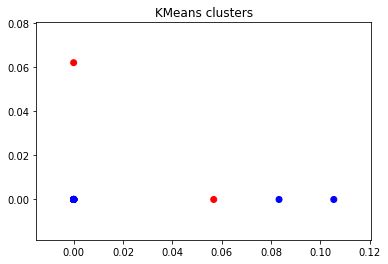

In [236]:
colors = ['red', 'blue','green','pink','brown']
pred_colors = [colors[label] for label in kmeans.labels_]

plt.scatter(X[:,0], X[:,200], c=pred_colors)
plt.title('KMeans clusters')

### Wordcloud for positive words

In [237]:
from wordcloud import WordCloud

In [239]:
pos_list=pos['Review'].unique().tolist()

In [241]:
pos = " ".join(pos_list)

In [243]:
pos_wordcloud = WordCloud().generate(pos)

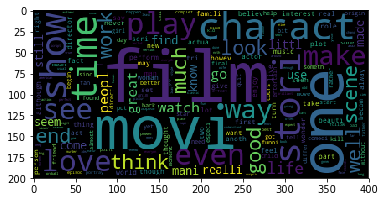

In [245]:
plt.figure()
plt.imshow(pos_wordcloud)
plt.show()

### Wordcloud for negative reviews

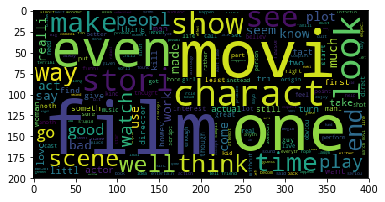

In [246]:
neg_list=neg['Review'].unique().tolist()
neg = " ".join(neg_list)
neg_wordcloud = WordCloud().generate(neg)
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()

### Positive words distribution

In [263]:
freq = pd.Series(' '.join(pos['Review']).split()).value_counts()[:10]

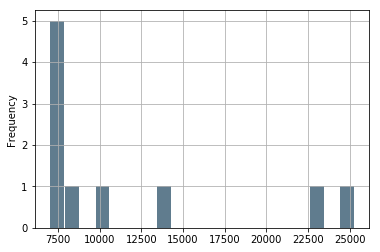

In [254]:
freq.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

In [268]:
freq=pd.DataFrame(freq)
freq.columns=['count']

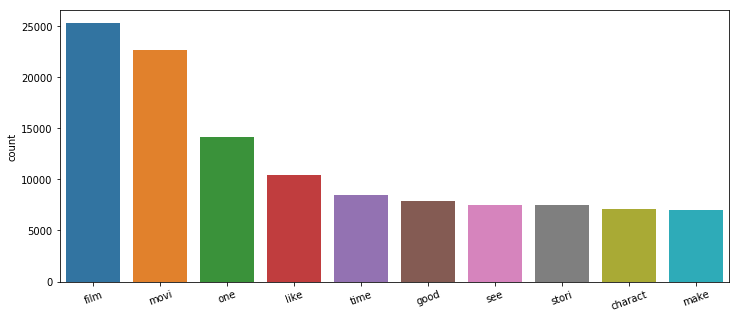

In [271]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x =freq.index, y = 'count', data = freq)
plt.xticks(rotation=20);

### Negative words distribution

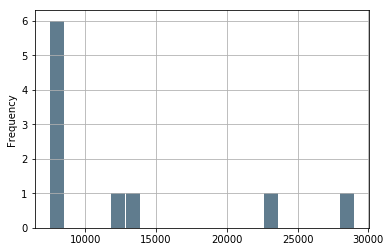

In [272]:
freq = pd.Series(' '.join(neg['Review']).split()).value_counts()[:10]
freq.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')

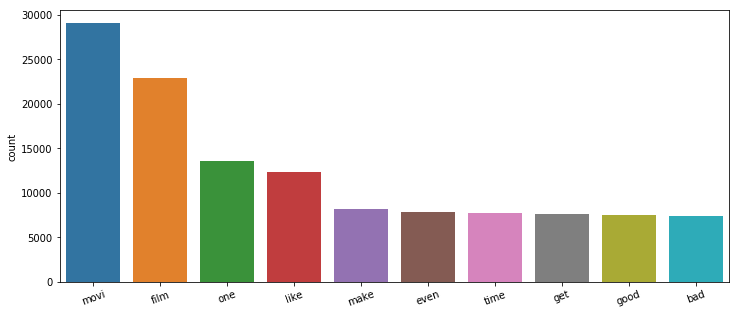

In [274]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x =freq.index, y = 'count', data = freq)
plt.xticks(rotation=20);

### Repeatition of above steps after feature selection

### Positive cloud

In [288]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=pd.DataFrame(cv.fit_transform(pos.Review[:50]).toarray(), columns=cv.get_feature_names())

test = SelectKBest(score_func=chi2, k=100)
fit = test.fit(x_train,y_train[:50])
features = fit.transform(x_train)
mask = test.get_support() 
new_features = [] 
feature_names = list(x_train.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)


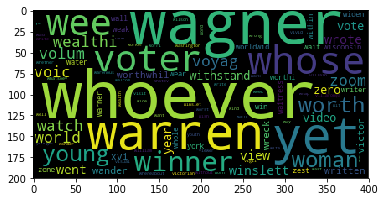

In [289]:
pos_feat = " ".join(new_features)
pos_aft_wordcloud = WordCloud().generate(pos_feat)
plt.figure()
plt.imshow(pos_aft_wordcloud)
plt.show()

### Negative word cloud

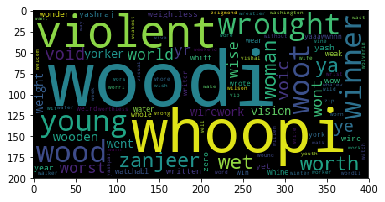

In [290]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train=pd.DataFrame(cv.fit_transform(neg.Review[:50]).toarray(), columns=cv.get_feature_names())

test = SelectKBest(score_func=chi2, k=100)
fit = test.fit(x_train,y_train[:50])
features = fit.transform(x_train)
mask = test.get_support() 
new_features = [] 
feature_names = list(x_train.columns.values)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
neg_feat = " ".join(new_features)
neg_aft_wordcloud = WordCloud().generate(neg_feat)
plt.figure()
plt.imshow(neg_aft_wordcloud)
plt.show()

### Phase 4

In [300]:
df.head()

,Label,Review
0,1,bromwel high cartoon comedi ran time program s...
1,1,homeless houseless georg carlin state issu yea...
2,1,brilliant act lesley ann warren best dramat ho...
3,1,easili underr film inn brook cannon sure flaw ...
4,1,typic mel brook film much le slapstick movi ac...


#### Jumble the datasets

In [314]:
df=df.sample(frac=1)
df.head()

,Label,Review
17718,0,easili one worst movi ever seen scari thing su...
1692,1,one funniest movi seen watch dvd disc special ...
24918,0,review movi without doubt would quot memor sce...
11463,1,thought kid movi great deal kid age group thou...
19670,0,seen poor movi time realli take biscuit oh fil...


In [406]:
cv = CountVectorizer()
cv.fit(df.Review)
X=cv.transform(df.Review[:50]).toarray()

In [407]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [408]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df.Label)

In [409]:
results=[]
names=[]

#### Naive bayes

In [410]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[:50], test_size=0.25, random_state=0)
clf = MultinomialNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy
results.append(accuracy)
names.append("Naive bayes")
accuracy

0.6923076923076923

#### Logistic Regression

In [411]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
results.append(accuracy)
names.append("Log Regression")
accuracy


0.6923076923076923

#### SVM

In [412]:
from sklearn.svm import SVC

clf = SVC(random_state = 100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
results.append(accuracy)
names.append("SVM")
accuracy


0.5384615384615384

#### K-NN

In [413]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = np.arange(3, 13, 1)
n_neighbors
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
results.append(accuracy)
names.append("K-NN")
accuracies


[0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384,
 0.5384615384615384]

### random forest

In [414]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
results.append(accuracy)
names.append("Random Forest")
accuracy


0.46153846153846156

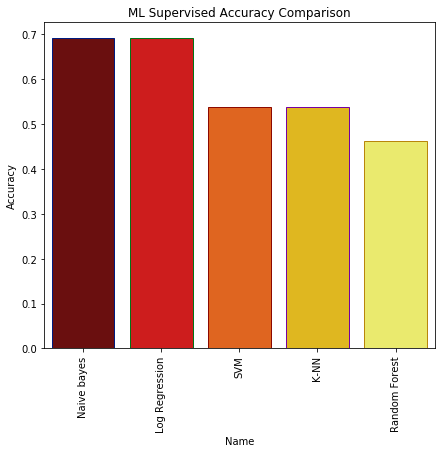

In [429]:
comp=pd.DataFrame({'Name':names , 'Accuracy': results})
plt.subplots(figsize=(7,6))
sns.barplot(x="Name", y="Accuracy",data=comp,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('ML Supervised Accuracy Comparison')
plt.show()

In [422]:
names

['Naive bayes', 'Log Regression', 'SVM', 'K-NN', 'Random Forest']

## Unsupervised learning

### K-means

In [362]:
X=df.Review
y=df.Label[:50]
X=pd.DataFrame(X)
X=vectorizer.fit_transform(data.Review[:50]).toarray()

### Predicted Clusters

Text(0.5,1,u'KMeans clusters')

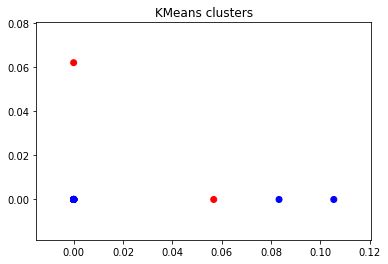

In [368]:
kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)
kmeans.labels_
kmeans.cluster_centers_  
colors = ['red', 'blue']
pred_colors = [colors[label] for label in kmeans.labels_]
actual_colors = [colors[label] for label in y]
plt.scatter(X[:,0], X[:,200], c=pred_colors)
plt.title('KMeans clusters')

#### Actual cluster

Text(0.5,1,u'KMeans clusters')

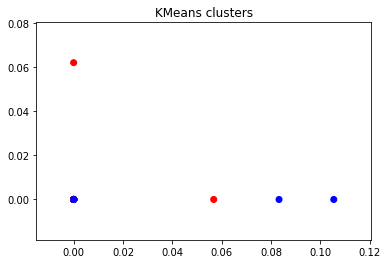

In [367]:
plt.scatter(X[:,0], X[:,200], c=actual_colors)
plt.title('KMeans clusters')

### Heirachical Clustering-Agglomerative

Text(0.5,1,u'Hierarchical clustering')

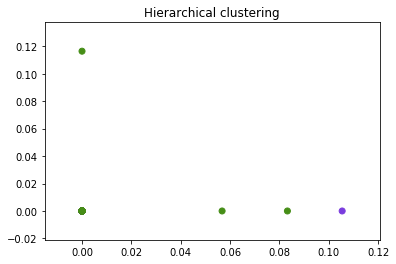

In [399]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 2
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
ward.fit(X)
colors =np.random.rand(n_clusters, 3)
pred_colors = [colors[label] for label in ward.labels_]

plt.scatter(X[:, 0],X[:, 10],c=pred_colors)
plt.title('Hierarchical clustering')